In [1]:
import pandas as panditas
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [54]:
df=panditas.read_csv('/content/IRIS.csv')

In [55]:
df

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,not Iris-virginica
1,2,4.9,3.0,1.4,0.2,not Iris-virginica
2,3,4.7,3.2,1.3,0.2,not Iris-virginica
3,4,4.6,3.1,1.5,0.2,not Iris-virginica
4,5,5.0,3.6,1.4,0.2,not Iris-virginica
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [56]:
df.columns = ['Id','Largo del sépalo en cm', 'Ancho del sépalo en cm', 'Largo del pétalo en cm', 'Ancho del pétalo en cm', 'Especie']

In [57]:
df.drop('Id',axis=1,inplace=True)
df

,Largo del sépalo en cm,Ancho del sépalo en cm,Largo del pétalo en cm,Ancho del pétalo en cm,Especie
0,5.1,3.5,1.4,0.2,not Iris-virginica
1,4.9,3.0,1.4,0.2,not Iris-virginica
2,4.7,3.2,1.3,0.2,not Iris-virginica
3,4.6,3.1,1.5,0.2,not Iris-virginica
4,5.0,3.6,1.4,0.2,not Iris-virginica
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [58]:
df["Especie"].replace(("not Iris-virginica","Iris-virginica"),(0,1), inplace=True)

/tmp/ipython-input-1884528513.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Especie"].replace(("not Iris-virginica","Iris-virginica"),(0,1), inplace=True)
/tmp/ipython-input-1884528513.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Especie"].replace(("not Iris-virginica","Iris-vir

In [59]:
df.groupby('Especie').size()

,0
Especie,
0,100
1,50


In [60]:
df

,Largo del sépalo en cm,Ancho del sépalo en cm,Largo del pétalo en cm,Ancho del pétalo en cm,Especie
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,1
146,6.3,2.5,5.0,1.9,1
147,6.5,3.0,5.2,2.0,1
148,6.2,3.4,5.4,2.3,1


In [61]:
df2=[df["Ancho del pétalo en cm"], df["Especie"]]
newdata=panditas.concat(df2, axis=1)
newdata

,Ancho del pétalo en cm,Especie
0,0.2,0
1,0.2,0
2,0.2,0
3,0.2,0
4,0.2,0
...,...,...
145,2.3,1
146,1.9,1
147,2.0,1
148,2.3,1


In [62]:
train, test = train_test_split(df, test_size = 0.30)

In [63]:
print("Muestras usadas para entrenar:", len(train))

print("Muestras usadas para prueba: ", len(test))

Muestras usadas para entrenar: 105
Muestras usadas para prueba:  45


In [64]:
train_x = train[["Ancho del pétalo en cm"]]
train_y = train[["Especie"]]
test_x = test[["Ancho del pétalo en cm"]]
test_y = test[["Especie"]]

In [65]:
mdl=LogisticRegression()
mdl.fit(train_x, train_y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [66]:
y_train_pred=mdl.predict(train_x)
y_train_prob= panditas.DataFrame(mdl.predict_proba(train_x),index=train.index)

In [67]:
train.sort_values("Ancho del pétalo en cm",inplace=True)

In [68]:
train["probabilidad_y"]=y_train_prob[1]

<Axes: xlabel='Ancho del pétalo en cm', ylabel='Especie'>

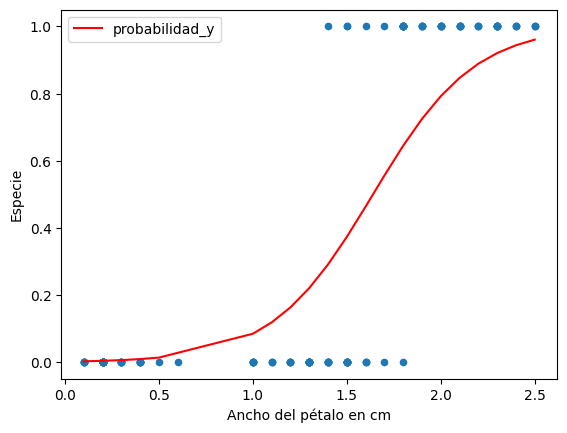

In [69]:
ax=df.plot.scatter(x="Ancho del pétalo en cm", y="Especie")
train.plot.line(x="Ancho del pétalo en cm",y="probabilidad_y", ax=ax, color="Red")

In [70]:
print('Exactitud: ',metrics.accuracy_score(train_y, y_train_pred))

Exactitud:  0.9523809523809523


In [71]:
y_test_pred=mdl.predict(test_x)
y_test_prob= panditas.DataFrame(mdl.predict_proba(test_x),index=test.index)

In [72]:
print('Exactitud: ',metrics.accuracy_score(test_y, y_test_pred))

Exactitud:  0.9777777777777777


In [73]:
cm=metrics.confusion_matrix(test_y,y_test_pred)
print(cm)

[[31  1]
 [ 0 13]]
